<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



In [3]:
# A:

df = pd.read_csv(sac_csv)

df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
# A:

df.shape

(985, 12)

In [5]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [6]:
df['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [7]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
df['zip'] = df['zip'].astype(str)

In [9]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [10]:
##beds are 0 and baths are 0. lets dig deeper

##These could be residential property that has yet to be built yet. we might as well keep this

df[df['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [11]:
df[df['sq__ft'] <0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [12]:
df.drop(703, inplace = True)

In [13]:
df.shape

(984, 12)

In [14]:
df[df.duplicated(keep = False)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
341,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [15]:
df.drop([341,403,601], inplace = True)


In [16]:
df.shape

(981, 12)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

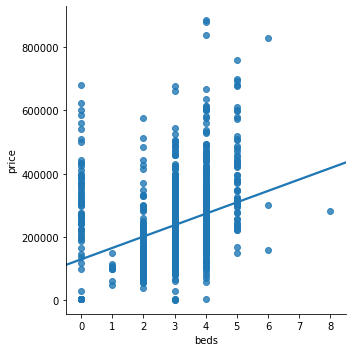

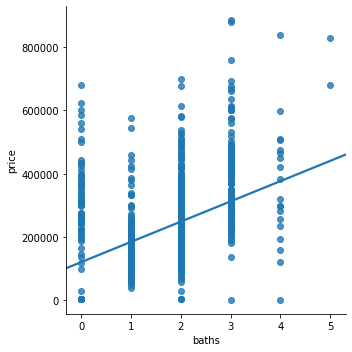

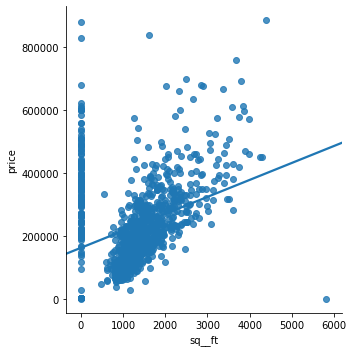

In [17]:
# A:

sns.lmplot(x='beds', y='price', data= df, ci=False);

plt.show()
sns.lmplot(x='baths', y='price', data=df, ci=False);

plt.show()
sns.lmplot(x='sq__ft', y='price', data=df, ci=False);

plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [18]:
# A:

##Square feet

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [19]:
# A:

def lin_regression(x, y):

    # Calculate the five "ingredients."
    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1 * x_bar

    # Return line of best fit.
    return (f'The slope is {beta_1}, and the intercept is {beta_0}')

### 6. Interpret the intercept. Interpret the slope.

In [20]:
# A: 

x = df['sq__ft'].values

y = df['price'].values


lin_regression(x,y)

'The slope is 53.766463876507586, and the intercept is 163822.20882516203'

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [21]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [22]:
# A: 
y_predictions = []
for squarefeet in df['sq__ft']:
    y = 162938 + 54.15 * squarefeet
    y_predictions.append(y)
    
y_predictions

[208207.4,
 226131.05,
 206041.4,
 209073.8,
 206095.55,
 223694.3,
 222719.6,
 226672.55,
 213893.15,
 224993.9,
 212160.35,
 232737.34999999998,
 210102.65,
 218171.0,
 218279.3,
 224344.1,
 208640.6,
 205987.25,
 194778.2,
 236365.4,
 223477.7,
 234903.34999999998,
 230084.0,
 249632.15,
 211727.15,
 221853.2,
 215084.45,
 223531.85,
 237665.0,
 230517.2,
 219199.85,
 225318.8,
 237665.0,
 223369.4,
 219199.85,
 239722.7,
 221528.3,
 242646.8,
 224993.9,
 204092.0,
 233549.59999999998,
 228297.05,
 220120.4,
 219416.45,
 248874.05,
 223586.0,
 248495.0,
 268801.25,
 252610.4,
 242917.55,
 227268.2,
 249036.5,
 242159.45,
 255751.09999999998,
 227105.75,
 239072.9,
 268151.45,
 226401.8,
 225318.8,
 263169.65,
 228730.25,
 224127.5,
 249740.45,
 243025.84999999998,
 239831.0,
 232250.0,
 248819.9,
 236690.3,
 280010.3,
 231491.9,
 255805.25,
 261491.0,
 213622.4,
 162938.0,
 244758.65,
 249036.5,
 249361.4,
 235553.15,
 278602.4,
 250444.4,
 242971.7,
 232629.05,
 232087.55,
 241347.

In [23]:
df['y_hat'] = y_predictions

df

residuals = df['y_hat'] - df['price']


np.sqrt(np.mean(residuals ** 2))

130433.48494959876

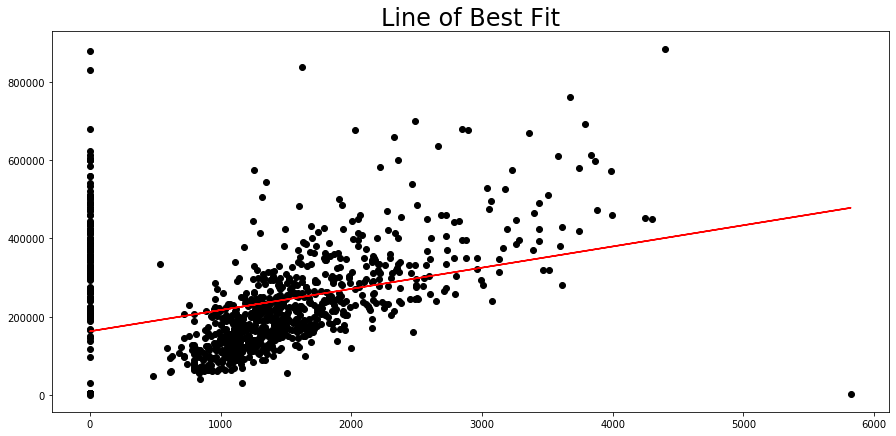

In [24]:
# Create a figure.
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
plt.scatter(df['sq__ft'],df['price'], color = 'black')

# Also generate a line for our prediction.
plt.plot(df['sq__ft'],
         df['y_hat'],
         color = 'red')

# Create a title.
plt.title('Line of Best Fit', fontsize = 24);

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [25]:
# A:

df = pd.get_dummies(df, columns = ['type'])

df.head()



,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,y_hat,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,208207.40,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,226131.05,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,206041.40,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,209073.80,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,206095.55,0,0,1,0


In [26]:
df.drop(['latitude', 'longitude', 'y_hat'], axis = 1, inplace = True)

In [27]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [28]:
# A:

df.drop(['type_Unkown'], axis =1, inplace = True)



In [29]:
df

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Thu May 15 00:00:00 EDT 2008,232425,0,0,1
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Thu May 15 00:00:00 EDT 2008,234000,0,0,1
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Thu May 15 00:00:00 EDT 2008,235000,0,0,1
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Thu May 15 00:00:00 EDT 2008,235301,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [30]:
# A:

model = LinearRegression()

x_list = ['beds', 'sq__ft', 'type_Condo', 'type_Residential', 'type_Multi-Family']


X = df[x_list]
y = df['price']


model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [31]:
# A:


y_pred = model.predict(X)

y_pred



array([203300.78345333, 235108.96967858, 202088.05476946, 203785.87492688,
       202118.37298656, 188780.62680173, 233198.92200148, 235412.15184955,
       161520.173141  , 234472.28711955, 227286.8696676 , 238807.79216439,
       182589.06468552, 230652.19176535, 208939.97183334, 167371.58904069,
       203543.32919011, 157093.71344486, 195781.86561332, 240839.11270988,
       233623.37704084, 261793.37721447, 259095.05589285, 248267.0758986 ,
       227044.32393083, 232713.83052793, 228924.05339083, 233653.69525793,
       263339.60628641, 237564.74526342, 164491.35841649, 234654.19642213,
       241566.74992021, 233562.74060664, 164491.35841649, 242718.84216989,
       232531.92122535, 266128.88225931, 256245.14348575, 134259.71948027,
       172525.68594715, 236321.69836246, 231743.64758083, 209576.65439237,
       269615.47722545, 255456.86984123, 269403.24970577, 280772.58111708,
       271707.43420513, 244507.6169786 , 235745.65223762, 269706.43187674,
       244083.16193924, 2

In [32]:
def plot_predictions(model_name, y_train_pred ,y_train_actual):
    plt.scatter(y_train_actual, y_train_pred, c = "blue", marker = "s", label = "Training data")
    plt.title("Regression Sales Price")
    plt.xlabel("$\hat{y}$ = Actual SalePrice")
    plt.ylabel("$y$ = Predicted SalePrice")
    plt.legend(loc = "upper left")
    plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], c='red')
    plt.tight_layout()

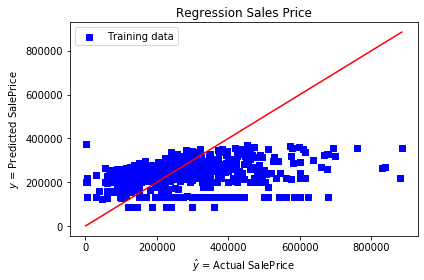

In [33]:
plot_predictions(model, y_pred, y)

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [34]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [35]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [36]:
# A:
from sklearn import metrics

metrics.r2_score(y,y_pred)

model.score(X,y)

0.14353109029741573

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [37]:
# A:



metrics.mean_squared_error(y, y_pred)



16372767754.719627

In [38]:
metrics.mean_absolute_error(y, y_pred)

95771.46371033319

In [39]:
def RSS(y, yhat):
    return np.sum((y-yhat)**2)


RSS(y, y_pred)

16061685167379.955

In [40]:
metrics.adjusted_rand_score(y,y_pred)

0.26715451149254543

In [41]:

from sklearn.model_selection import train_test_split, cross_val_score

cross_val_score(model, X, y, cv = 5).mean()

0.0010415561089581527

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [44]:
# A:


model = LinearRegression()

x_listt = ['beds', 'sq__ft']


X = df[x_list]
y = df['price']


model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:

y_pred = model.predict(X)

y_pred

array([203300.78345333, 235108.96967858, 202088.05476946, 203785.87492688,
       202118.37298656, 188780.62680173, 233198.92200148, 235412.15184955,
       161520.173141  , 234472.28711955, 227286.8696676 , 238807.79216439,
       182589.06468552, 230652.19176535, 208939.97183334, 167371.58904069,
       203543.32919011, 157093.71344486, 195781.86561332, 240839.11270988,
       233623.37704084, 261793.37721447, 259095.05589285, 248267.0758986 ,
       227044.32393083, 232713.83052793, 228924.05339083, 233653.69525793,
       263339.60628641, 237564.74526342, 164491.35841649, 234654.19642213,
       241566.74992021, 233562.74060664, 164491.35841649, 242718.84216989,
       232531.92122535, 266128.88225931, 256245.14348575, 134259.71948027,
       172525.68594715, 236321.69836246, 231743.64758083, 209576.65439237,
       269615.47722545, 255456.86984123, 269403.24970577, 280772.58111708,
       271707.43420513, 244507.6169786 , 235745.65223762, 269706.43187674,
       244083.16193924, 2

In [48]:
def plot_predictions(model_name, y_train_pred ,y_train_actual):
    plt.scatter(y_train_actual, y_train_pred, c = "blue", marker = "s", label = "Training data")
    plt.title("Regression Sales Price")
    plt.xlabel("$\hat{y}$ = Actual SalePrice")
    plt.ylabel("$y$ = Predicted SalePrice")
    plt.legend(loc = "upper left")
    plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], c='red')
    plt.tight_layout()

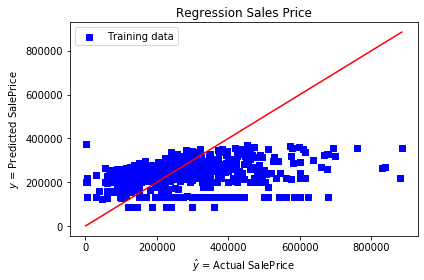

In [50]:
plot_predictions(model, y_pred, y)

In [52]:

metrics.mean_squared_error(y, y_pred)

16372767754.719627

In [53]:
from sklearn import metrics

metrics.r2_score(y,y_pred)

model.score(X,y)

0.14353109029741573

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
## High Bias Low VArianceS

In [43]:
# A: